# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn.

https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns = housing.feature_names)
y = pd.DataFrame(housing.target, columns = ['MedHouseVal'])


In [90]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [91]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.


In [92]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [94]:
y.isna().sum()

MedHouseVal    0
dtype: int64

In [95]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [99]:
Z = pd.concat([X, y], axis=1)

In [101]:
Z.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


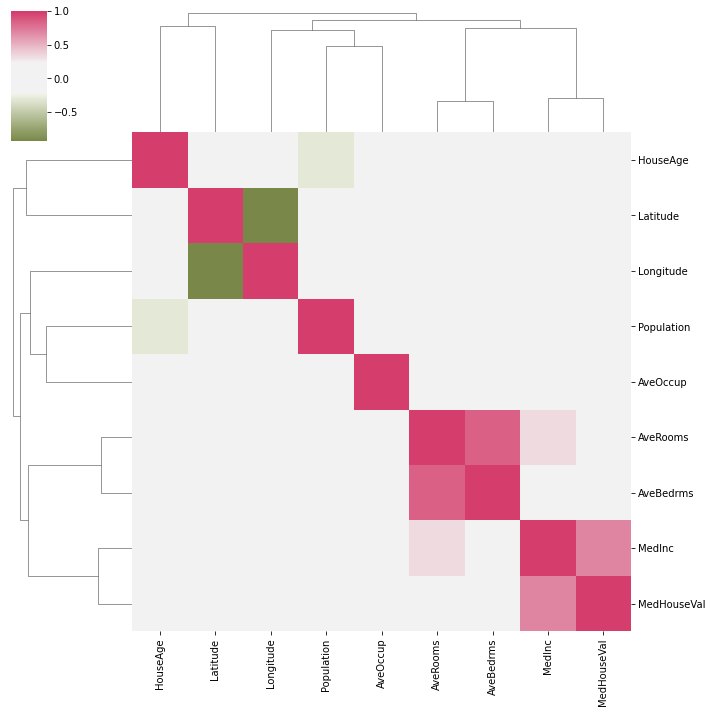

In [103]:
cmap = sns.diverging_palette(h_neg=100, h_pos=359, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(Z.corr(), figsize=(10, 10), center = 0, cmap=cmap);

#### A variável que apresenta uma correlação maior e positava são O Valor da mediana de venda da casa (MedHouseVal) e o valor da mediana da renda (MedInc). 

### 3. Separe os dados em validação e teste

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [106]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train);

### 5. Calcule o R² e MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [129]:
r2_1 = regr_1.score(X_train, y_train)
r2_2 = regr_2.score(X_train, y_train)

print(f' O R² da árvore com profundidade {regr_1.get_depth()} é {round(r2_1, 2)}')
print(f' O R² da árvore com profundidade {regr_2.get_depth()} é {round(r2_2, 2)}')

 O R² da árvore com profundidade 2 é 0.45
 O R² da árvore com profundidade 8 é 0.76


In [130]:
extra_mse = regr_1.tree_.impurity
for idx, MSE in enumerate(regr_1.tree_.impurity):
    print(f'O nó {idx} da árvore 1 com profundidade 2 tem MSE: {round(MSE, 2)}')

O nó 0 da árvore 1 com profundidade 2 tem MSE: 1.33
O nó 1 da árvore 1 com profundidade 2 tem MSE: 0.83
O nó 2 da árvore 1 com profundidade 2 tem MSE: 0.57
O nó 3 da árvore 1 com profundidade 2 tem MSE: 0.82
O nó 4 da árvore 1 com profundidade 2 tem MSE: 1.22
O nó 5 da árvore 1 com profundidade 2 tem MSE: 0.91
O nó 6 da árvore 1 com profundidade 2 tem MSE: 0.7


In [124]:
extra_mse = regr_2.tree_.impurity
for idx, MSE in enumerate(regr_2.tree_.impurity):
    print(f'O nó {idx} da árvore 1 com profundidade 8 tem MSE: {round(MSE, 2)}')

O nó 0 da árvore 1 com profundidade 8 tem MSE: 1.33
O nó 1 da árvore 1 com profundidade 8 tem MSE: 0.83
O nó 2 da árvore 1 com profundidade 8 tem MSE: 0.57
O nó 3 da árvore 1 com profundidade 8 tem MSE: 0.7
O nó 4 da árvore 1 com profundidade 8 tem MSE: 1.06
O nó 5 da árvore 1 com profundidade 8 tem MSE: 1.01
O nó 6 da árvore 1 com profundidade 8 tem MSE: 1.34
O nó 7 da árvore 1 com profundidade 8 tem MSE: 1.15
O nó 8 da árvore 1 com profundidade 8 tem MSE: 1.21
O nó 9 da árvore 1 com profundidade 8 tem MSE: 0.16
O nó 10 da árvore 1 com profundidade 8 tem MSE: 1.49
O nó 11 da árvore 1 com profundidade 8 tem MSE: 0.44
O nó 12 da árvore 1 com profundidade 8 tem MSE: 1.17
O nó 13 da árvore 1 com profundidade 8 tem MSE: 0.62
O nó 14 da árvore 1 com profundidade 8 tem MSE: 0.56
O nó 15 da árvore 1 com profundidade 8 tem MSE: 0.61
O nó 16 da árvore 1 com profundidade 8 tem MSE: 0.12
O nó 17 da árvore 1 com profundidade 8 tem MSE: 0.0
O nó 18 da árvore 1 com profundidade 8 tem MSE: 0.88
O nó 

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

#### R - Em relação ao R² a árvore mais adequada é a de profundidade 8, mas observando o mse de cada nó, ela parece está overfitting. 

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

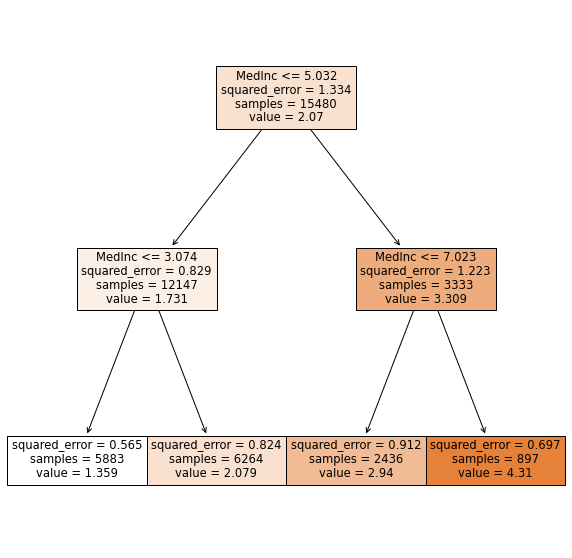

In [131]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True) 

#### A variável mais importante foi a mediana da renda (MedInd)